In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("creditcard_2023.csv") 
# Split features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Accuracy: Measures overall correctness, showing the ratio of correctly predicted instances to the total instances.
 Higher accuracy indicates more correct predictions overall.
 
# Precision: Indicates the accuracy of identifying positive cases (e.g., fraudulent transactions) out of all predicted positive cases.
Higher precision means fewer false positives.

# Recall: Measures the ability to capture all positive cases 
(e.g., fraudulent transactions) out of all actual positive cases. Higher recall means fewer false negatives.

# F1 Score: Balances precision and recall into a single metric.
It's the harmonic mean of precision and recall, providing a balanced evaluation of the model's performance. 
Higher F1 score indicates a better balance between precision and recall, especially useful when there's class 

# using pre defined libraries

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the logistic regression classifier using scikit-learn
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_classifier.predict(X_test)8

# Calculate performance metrics
accuracy_sklearn = accuracy_score(y_test, y_pred)
precision_sklearn = precision_score(y_test, y_pred)
recall_sklearn = recall_score(y_test, y_pred)
f1_sklearn = f1_score(y_test, y_pred)

print("Performance metrics using scikit-learn's Logistic Regression implementation:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_sklearn)


Performance metrics using scikit-learn's Logistic Regression implementation:
Accuracy: 0.9951901939749925
Precision: 0.996044234251657
Recall: 0.99434849761303
F1 Score: 0.9951956435817487


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# without using pre defined libraries

In [9]:
import numpy as np

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X, threshold=0.5):
        return np.where(self.sigmoid(np.dot(X, self.theta)) >= threshold, 1, 0)

# Initialize and train logistic regression classifier from scratch
log_reg_classifier_scratch = LogisticRegressionFromScratch()
log_reg_classifier_scratch.fit(X_train.values, y_train.values)

# Predict on the test set
y_pred_scratch = log_reg_classifier_scratch.predict(X_test.values)

# Calculate performance metrics
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)
f1_scratch = f1_score(y_test, y_pred_scratch)

print("\nPerformance metrics using scratch implementation of Logistic Regression:")
print("Accuracy:", accuracy_scratch)
print("Precision:", precision_scratch)
print("Recall:", recall_scratch)
print("F1 Score:", f1_scratch)


C:\Users\Karishma\AppData\Local\Temp\ipykernel_1188\2582381989.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))



Performance metrics using scratch implementation of Logistic Regression:
Accuracy: 0.6419288465258604
Precision: 0.7479406919275123
Recall: 0.4302864363942713
F1 Score: 0.546293201417207


# Correlation Heatmap:
The correlation heatmap visualizes the pairwise correlations between different features in the dataset.
Each cell in the heatmap represents the correlation coefficient between two features. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.
By analyzing the correlation heatmap, we can identify:
Features that are highly correlated with each other, which may indicate redundancy and multicollinearity.
Features that are strongly correlated (positively or negatively) with the target variable, which may be important for predicting fraud.

In [ ]:
Red: Strong positive correlation (close to 1) means when one feature increases, the other tends to increase.
Blue: Strong negative correlation (close to -1) means when one feature increases, the other tends to decrease.
White: No correlation (close to 0) means changes in one feature do not predictably affect the other.

# Transaction Amount Distribution:
The histogram visualizes the distribution of transaction amounts in the dataset.
It shows the frequency of transaction amounts within certain ranges.
Analyzing this distribution can provide insights into:
The typical range and distribution of transaction amounts in the dataset.
Whether there are any outliers or extreme values in the transaction amounts.

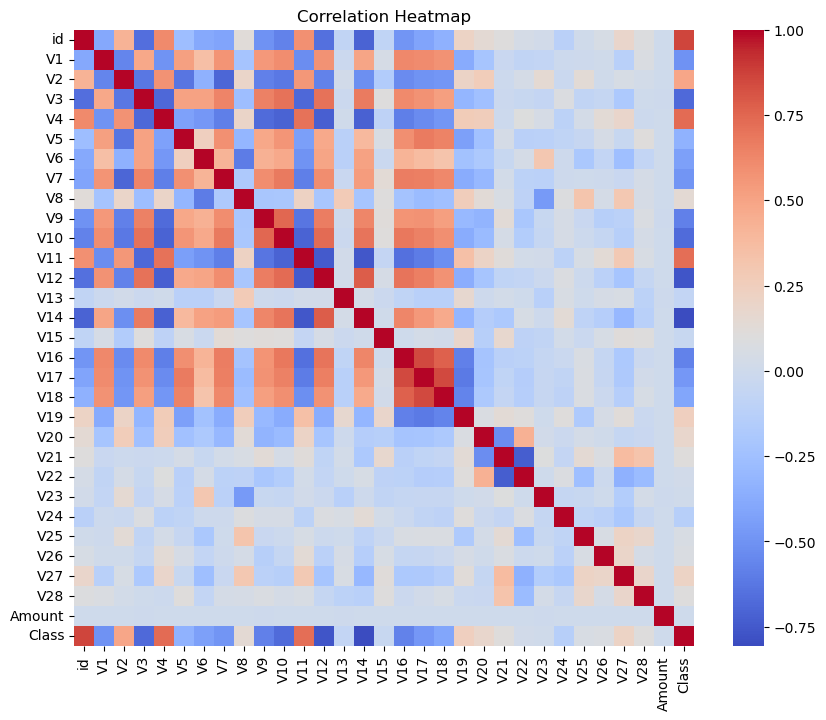

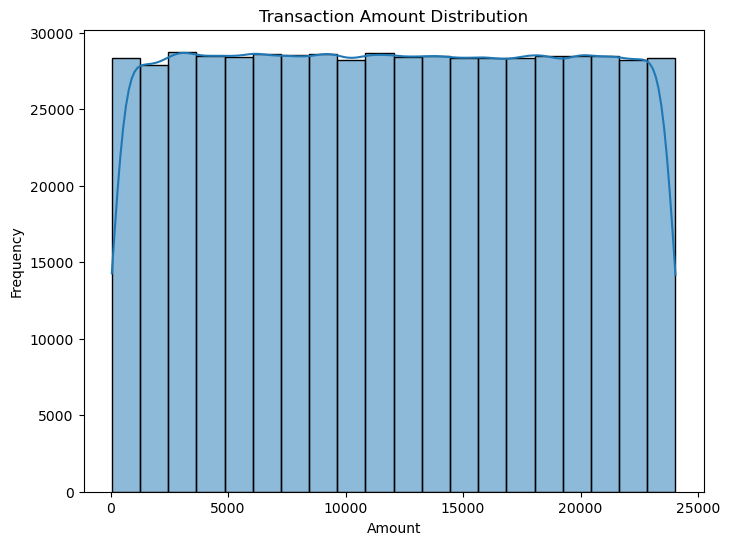

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("creditcard_2023.csv")  # Replace "your_data.csv" with the actual file path

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Transaction Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=20, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


